In [404]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
#
# @Author: Mingyeong Yang (ggong@kasi.re.kr)
# @Date: 2023-10-06
# @Filename: hw3.ipynb

import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import sys
import math

In [405]:
class handling_txts:
    """handling the txt file"""

    def __init__(self, file_name: str):
        self.file_name = file_name
        self.file = open(file_name, 'r')
        #print(self.file_name)

    def rd_savetolist(self):

        self.value_list = []
        while True:
            line = self.file.readline()
            line = line.strip()
            #print(line)
            if not line: break
            val = float(line)
            self.value_list.append(val)

        return self.value_list

    def rd_savetolist_abc(self):

        self.first_list = []
        self.second_list = []
        self.third_list = []
        while True:
            line = self.file.readline()
            line = line.strip()
            #print(line)
            if not line: break
            item = line.split(" ")
            first_val = float(item[0])
            self.first_list.append(first_val)
            second_val = float(item[1])
            self.second_list.append(second_val)
            third_val = float(item[2])
            self.third_list.append(third_val)

        return self.first_list, self.second_list, self.third_list

    def rd_ln(self):

        list_len = len(self.value_list)
        return list_len


In [406]:
# Then calculate the following for each dataset:

"""
1. Mean
2. Geometric mean (can you?!)
3. Median
4. Mode
5. Variance
6. Standard deviation
7. Skewness
8. Kurtosis
"""

class Cal_sample_statistic:
    """calculate sample statistic 
    
    1. Mean
    2. Geometric mean (can you?!)
    3. Median
    4. Mode
    5. Variance
    6. Standard deviation
    7. Skewness
    8. Kurtosis
    
    """

    def __init__(self, data: list):
        self.data = data
        self.num = len(data)

    def mean(self):
        # mean = sum / num
        sum = 0
        for i in self.data:
            sum = sum + i
        self.num = len(self.data)

        self.mean_val = sum / self.num
        
        return self.mean_val
    
    def geo_mean(self):
        # geo_mean = multip**(1/num)
        multip = 1
        for i in self.data:
            multip = multip*i

        self.geo_mean = multip**(1/self.num)

        return self.geo_mean
    
    def median(self):
        sortlist = sorted(self.data)
        flag = self.num%2
        half = int(self.num/2)
        print(flag)
        if flag == 0:
            fir_term = half - 1
            sec_term = half
            self.median = (sortlist[fir_term] + sortlist[sec_term]) / 2
        else:
            fir_term = (self.num - 1)/2
            print(fir_term)
            self.median = sortlist[fir_term]

        return self.median
    
    def mode(self):
        # mode
        count_dic = {}
        for i in self.data:
            index = 0
            for j in self.data:
                if i==j:
                    index += 1
                else:
                    pass
            
            count_dic[i] = index
        sort_dic = sorted(count_dic.items(), key=lambda x:(-x[1], x[0]))
        mode_tup = sort_dic[0]

        frequency = mode_tup[1]

        if frequency==1:
            self.mode="Not exist"
        else:
            self.mode = mode_tup[0]

        return self.mode


    def variance(self):
        # sum((val - self.mean)**2)/self.num
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**2
            sum = sum + comp
        
        self.varianceval = sum / self.num
        return self.varianceval

    def StandardDeviation(self):
        # variance**(1/2)
        val=self.variance()
        self.StandardDeviation_val = val**(1/2)
        return self.StandardDeviation_val

    def skewness(self):
        # sum((val - self.mean)**3)/self.num
        # StandardDeviation**(3)
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**3
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**3
        self.skewness = top_comp / under_comp

        return self.skewness

    def kurtosis(self):
        # sum((val - self.mean)**4)/self.num
        # StandardDeviation**4
        
        sum = 0
        meanval= self.mean()
        for i in self.data:
            comp = (i - meanval)**4
            sum = sum + comp
        
        top_comp = sum / self.num
        val = self.StandardDeviation()
        under_comp = val**4
        self.kurtosis = top_comp / under_comp

        return self.kurtosis



In [407]:
def model1(a, b, x_list):
    model1 = []
    for x in x_list:
        if x == 0:
            model1_val = 1
        else:
            model1_val = (a*x)+(x**b)+1
        model1.append(model1_val)

    #print(f"model = {a}*x + x**{b} + 1")

    return model1

def model2(a, b, c, x_list):
    model2 = []
    for x in x_list:
        model2_val = a*np.tanh(x-b)+c
        model2.append(model2_val)

    return model2

def model3(a, b, x_list):
    model3 = []
    for x in x_list:
        model3_val = a*x*(np.sin(b))+1
        model3.append(model3_val)

    return model3

def model4(a, b, x_list):
    model4 = []
    for x in x_list:
        model4_val = a + b*(1+x)
        model4.append(model4_val)

    return model4

def model5(a, b, x_list):
    model5 = []
    for x in x_list:
        model5_val = np.sqrt(a*(1+x)**3+b)
        model5.append(model5_val)

    return model5


In [408]:
mk_h = handling_txts("regression_data_h.txt")
data_h_x, data_h_y, data_h_sigma_y = mk_h.rd_savetolist_abc()

mk_h_cal = Cal_sample_statistic(data_h_x)
x_sigma = mk_h_cal.StandardDeviation()

data_2 = np.loadtxt("./regression_data_h.txt")
#print(data_2)

In [409]:

data_x = data_h_x  # Your x-values
data_y = data_h_y  # Your y-values
data_err = data_h_sigma_y  # Measurement errors

# params = [a, b]
m1_params = [1,0, 36.96574134162346]
m2_params = [3,3,5, 16.69311963232232]
m3_params = [-2, -7, 9.154728169288067]
m4_params = [-3,2, 27.56467516818103]
m5_params = [-10, 0, 273.15803961963667]

# Define the chi-squared function
def chi_squared(y_data, mod, err):
    # Calculate the residuals
    chisq = 0
    for i in range(len(y_data)):
        temp1 = (y_data[i]-mod[i])**2
        temp2 = err[i]**2
        chisq = chisq + temp1/temp2
    return chisq



In [410]:
n = 100
ranges = 0.1
best_fit_params = m4_params[0:2]
print(best_fit_params)
#mod = model1(best_fit_params[0], best_fit_params[1], data_x)
chisqval = np.zeros((n,n))
lwr = 1-ranges
hwr = 1 + ranges
samp1 = np.linspace(lwr*best_fit_params[0],hwr*best_fit_params[0],n)
samp2 = np.linspace(lwr*best_fit_params[1],hwr*best_fit_params[1],n)
for i in range(len(samp1)):
    for j in range(len(samp2)):
        chisqval[i,j] = chi_squared(data_y, model4(samp1[i], samp2[j], data_x), data_err)

[-3, 2]


In [411]:
#chisqdata = chis - min_chi2
chisqdata = []
#temp = 0
for ch in chisqval:
    temp = ch - temp.min()
    chisqdata.append(temp)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


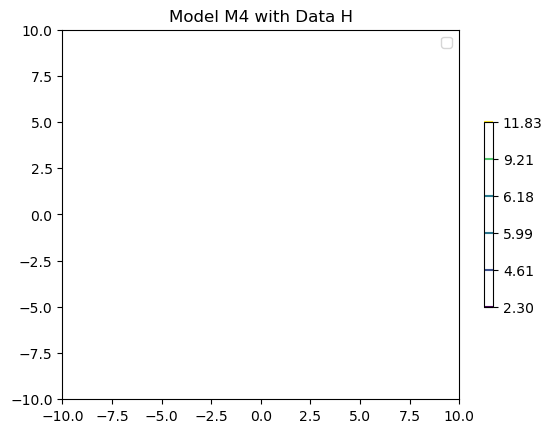

In [412]:
rng = 1
lwr = 1- rng
hwr = 1 + rng
n = 100
prob_df_2=[2.3, 4.61, 5.99, 6.18, 9.21, 11.83]
samp1 = np.linspace(lwr*best_fit_params[0],hwr*best_fit_params[0],n)
samp2 = np.linspace(lwr*best_fit_params[1],hwr*best_fit_params[1],n)
X, Y = np.meshgrid(samp1, samp2)
fig, ax = plt.subplots()

CS =  ax.contour(X,Y,chisqdata,levels=prob_df_2)
ax.set_ylim([-10,10])
ax.set_xlim([-10,10])
ax.set_title('Model M4 with Data H')
ax.clabel(CS, CS.levels, inline=True)
fig.colorbar(CS, shrink=0.5)
plt.legend()